<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220804_CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 사기 검출 모델링

## 데이터 1차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [ ]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d mlg-ulb/creditcardfraud

 92% 61.0M/66.0M [00:00<00:00, 161MB/s]
100% 66.0M/66.0M [00:00<00:00, 159MB/s]


In [ ]:
!unzip '*.zip' -d/content

Archive:  creditcardfraud.zip
  inflating: /content/creditcard.csv  


In [2]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
card_df = pd.read_csv('/content/creditcard.csv')
card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_df.head(3).T

,0,1,2
Time,0.000000,0.000000,1.000000
V1,-1.359807,1.191857,-1.358354
V2,-0.072781,0.266151,-1.340163
V3,2.536347,0.166480,1.773209
V4,1.378155,0.448154,0.379780
V5,-0.338321,0.060018,-0.503198
V6,0.462388,-0.082361,1.800499
V7,0.239599,-0.078803,0.791461
V8,0.098698,0.085102,0.247676
V9,0.363787,-0.255425,-1.514654


In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [8]:
from sklearn.model_selection import train_test_split

# 인자로 입력 받은 DataFrame을 복사 한뒤 Time 컬럼만 삭제하고 복사된 DataFrame을 반환
def get_preprocessed_df(df=None): # 데이터 프레임을 입력으로 받음
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace = True)
  return df_copy

In [9]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
  #인자로 입력된 Dataframe의 사전 데이터 가공이 완료된 복사 dataframe 반환
  df_copy = get_preprocessed_df(df)
  # Dataframe의 맨마지막 컬럼이 레이블, 나머지는 피처들
  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]
  # train_test_split()으로 학습과 테스트 데이터 분할.
  # stratify=y_target으로 층화추출 기반 분할 -> y데이터가 적기때문에 테스트에 포함안되는걸 방지해서 균등 한 x:y비율로 데이터 분할
  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target,
                   test_size=0.3, random_state=0, stratify=y_target)
  # 학습과 테스트 데이터 세트 반환
  return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [11]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('학습 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
학습 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [12]:
# 평가함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f},\
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [13]:
# 인자로 사이킷런의 Estimator 객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
# ML알고리즘 객체 전달 후 학습/예측/평가 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None,
                         tgt_train=None, tgt_test=None):
  start_time = time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test, pred)
  print('수행시간 : {0:.1f}초 '.format(time.time() - start_time))

In [ ]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=900)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85280    15]
 [   56    92]]
정확도 : 0.9992, 정밀도 : 0.8598, 재현률 : 0.6216,  F1 : 0.7216
수행시간 : 52.2초 


In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, n_jobs=-1, num_leaves=64,
                              boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9492, 재현률 : 0.7568,  F1 : 0.8421
수행시간 : 59.9초 


In [ ]:
from sklearn.tree import DecisionTreeClassifier

Ir_clf = DecisionTreeClassifier()
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85265    30]
 [   37   111]]
정확도 : 0.9992, 정밀도 : 0.7872, 재현률 : 0.7500,  F1 : 0.7682
수행시간 : 16.0초 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Ir_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85290     5]
 [   40   108]]
정확도 : 0.9995, 정밀도 : 0.9558, 재현률 : 0.7297,  F1 : 0.8276
수행시간 : 1370.4초 


## 데이터 분포도 변환 후 모델 학습/예측/평가

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


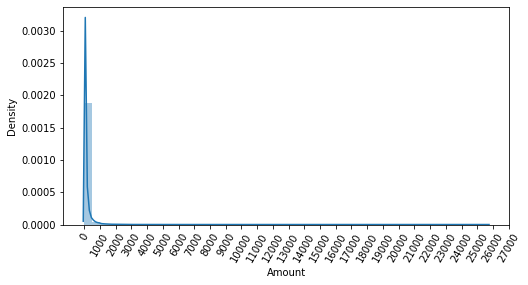

In [14]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [15]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피쳐값 변환하는 로직으로 수정.

def get_preprocessed_df(df=None): # 데이터 프레임을 입력으로 받음
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 컬럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time','Amount'], axis=1, inplace = True)
  return df_copy

In [16]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=900)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654, 재현률 : 0.6081,  F1 : 0.7143
수행시간 : 3.1초 


### 이상치 제거

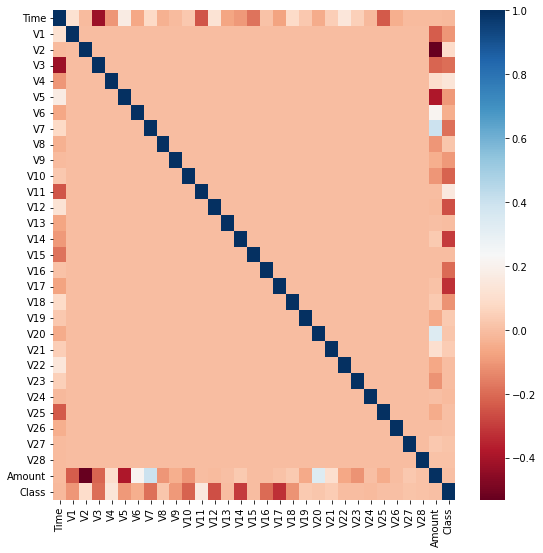

In [17]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [18]:
card_df[card_df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
from pandas.core.algorithms import quantile
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 치점을 np.percent
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  # 최대값보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 Dataframe index 반환.
  outlier_index = fraud[(fraud<lowest_val) | (fraud > highest_val)].index # | = or 둘 중 하나 만족하면 T
  return outlier_index

In [20]:
outlier_index = get_outlier(df=card_df, column = 'V14')
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [21]:
def get_preprocessed_df(df=None): # 데이터 프레임을 입력으로 받음
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 컬럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  # 기존 Time, Amount 피처 삭제
  df_copy.drop(['Time','Amount'], axis=1, inplace = True)
  # 이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight = 1.5)
  df_copy.drop(outlier_index, axis = 0, inplace = True)
  return df_copy

In [22]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
print('\n### 로지스틱 회귀 예측 성능 ###')
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=900)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)




### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85279    16]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8596, 재현률 : 0.6712,  F1 : 0.7538
수행시간 : 6.4초 


In [ ]:
print('\n### LightGBM 회귀 예측 성능 ###')

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, n_jobs=-1, num_leaves=64,
                              boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[85290     5]
 [   26   120]]
정확도 : 0.9996, 정밀도 : 0.9600, 재현률 : 0.8219,  F1 : 0.8856
수행시간 : 35.9초 


In [ ]:
print('\n### 랜덤포레스트 예측 성능 ###')

from sklearn.ensemble import RandomForestClassifier

Ir_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)


### 랜덤포레스트 예측 성능 ###


## SMOTE 샘플링
- 언더샘플링과 오버샘플링을 이용해 불균형한 데이터의 균형을 맞춰준다.
- KNN 알고리즘으로 데이터 신규 증식 대상을 선정해서 근처의 임의의 샘플링을 만들어서 오버샘플링을 해준다.
  - 샘플링을 줄이는 것 언더샘플링(데이터가 아주 많을때)
  - 샘플링을 늘리는 것 오버샘플링(데이터가 적을때)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [ ]:
print('\n### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=900)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('\n### RandomForest 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[82936  2359]
 [   11   135]]
정확도 : 0.9723, 정밀도 : 0.0541, 재현률 : 0.9247,  F1 : 0.1023
수행시간 : 13.1초 

### LightGBM 예측 성능 ###
오차 행렬
[[85283    12]
 [   24   122]]
정확도 : 0.9996, 정밀도 : 0.9104, 재현률 : 0.8356,  F1 : 0.8714
수행시간 : 77.8초 

### RandomForest 예측 성능 ###


### Feature별 중요도 시각화

In [ ]:
# LightGBM의 feature 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)


In [44]:
# RandomForest의 feature 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

TypeError: ignored

In [49]:
ftr_importances

V1        0.012189
V2        0.012268
V3        0.021607
V4        0.046114
V5        0.101489
V6        0.010399
V7        0.011851
V8        0.029053
V9        0.017095
V10       0.017650
V11       0.125105
V12       0.080487
V13       0.097538
V14       0.009109
V15       0.188169
V16       0.006676
V17       0.049694
V18       0.073621
V19       0.015052
V20       0.010520
V21       0.008946
V22       0.010445
V23       0.004333
V24       0.006484
V25       0.005219
V26       0.004923
V27       0.006629
V28       0.011413
Amount    0.005922
dtype: float64

In [47]:
len(rf_clf.feature_importances_)

29

In [36]:
# RandomForest의 feature 중요도 시각화
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

TypeError: ignored